In [2]:
import numpy as np  # numerical library
import xarray as xr  # netCDF library
import pandas as pd

import matplotlib.pyplot as plt  # plotting library
import cartopy  # Map projections libary
import cartopy.crs as ccrs  # Projections list
import cartopy.feature as cfeature

import cftime

In [3]:
# Some defaults:
plt.rcParams['figure.figsize'] = (12, 5)  # Default plot size

In [4]:
#To compute de climatoloy
yearC1='2004'
yearC2='2009'

In [5]:
analisisDir='/Users/pvb/Dropbox/Oceanografia/Analisis/IEOOSWebPage'

In [6]:
Titulos = ['Demarcación marina levantino-balear', 'Demarcación marina noratlántica','Demarcación marina canaria','Demarcación sudatlántica','Demarcación Estrecho y Alborán']
Titulos_short = ['LEB', 'NOR','CAN','SUD','ESA']

In [102]:
i=1

titulo = Titulos[i]
titulo_short = Titulos_short[i]

Title  = 'Temperatura superficial en la '+ titulo
FileIn =  analisisDir+'/data/sstLD_anom_'+titulo_short+'.nc'
FileOut = analisisDir+'/images/map_sstd_anom_'+titulo_short+'.png'

In [103]:
# Load the data from the .txt file
lon, lat = [], []
with open('./LimiteDemarcaciones/Demarcacion'+titulo_short+'.txt', 'r') as f:
    for line in f:
        # Split the line by whitespace and append the values
        longitude, latitude = map(float, line.split())
        lon.append(longitude)
        lat.append(latitude)

## Read the data

In [104]:
DC=xr.open_dataset(analisisDir+'/data/EN_Global_Jan2000_Dic2023.nc')

In [105]:
DC

<xarray.Dataset> Size: 12GB
Dimensions:      (time: 288, depth: 42, lat: 173, lon: 360)
Coordinates:
  * lon          (lon) float32 1kB 1.0 2.0 3.0 4.0 ... 357.0 358.0 359.0 360.0
  * lat          (lat) float32 692B -83.0 -82.0 -81.0 -80.0 ... 87.0 88.0 89.0
  * depth        (depth) float32 168B 5.022 15.08 25.16 ... 5.051e+03 5.35e+03
  * time         (time) datetime64[ns] 2kB 2000-01-16T12:00:00 ... 2023-12-16...
Data variables:
    temperature  (time, depth, lat, lon) float64 6GB ...
    salinity     (time, depth, lat, lon) float64 6GB ...
Attributes:
    description:  EN4

In [106]:
if titulo_short == 'LEB':
        #sst = DS.sst.sel(lat=).sel(lon=slice(0,8))
        DC_temp=DC.temperature.sel(lat=slice(35.5,42.5)).sel(lon=slice(360+0,360+8))
        DC_salt=DC.salinity.sel(lat=slice(35.5,42.5)).sel(lon=slice(360+0,360+8))
        print('>>>>> '+titulo)        
elif  titulo_short == 'NOR':
        #sst = DS.sst.sel(lat=slice(41.8,46.2)).sel(lon=slice(348.5,359.5))
        DC_temp=DC.temperature.sel(lat=slice(41.5,47.3)).sel(lon=slice(346,359.5))
        DC_salt=DC.salinity.sel(lat=slice(41.5,47.3)).sel(lon=slice(346,359.5))
        print('>>>>> '+titulo)        
elif  titulo_short == 'CAN':
        DC_temp=DC.temperature.sel(lat=slice(24.3,32.5)).sel(lon=slice(336,350))
        DC_salt=DC.salinity.sel(lat=slice(24.3,32.5)).sel(lon=slice(336,350))
        print('>>>>> '+titulo)
elif  titulo_short == 'SUD':
        sliceLat=slice(35.5,37.5)
        sliceLon=slice(352,354)
        DC_temp=DC.temperature.sel(lat=sliceLat).sel(lon=sliceLon)
        DC_salt=DC.salinity.sel(lat=sliceLat).sel(lon=sliceLon)
        print('>>>>> '+titulo)
elif  titulo_short == 'ESA':
        sliceLat=slice(35.5,37)
        sliceLon=slice(354,359)
        DC_temp=DC.temperature.sel(lat=sliceLat).sel(lon=sliceLon)
        DC_salt=DC.salinity.sel(lat=sliceLat).sel(lon=sliceLon)
print('>>>>> '+titulo)

>>>>> Demarcación marina noratlántica
>>>>> Demarcación marina noratlántica


In [107]:
titulo_short

'NOR'

In [108]:
meanTemp=DC_temp.mean('time').sel(depth=10, method='nearest')

In [114]:
niveles=np.arange(15,18,0.1)

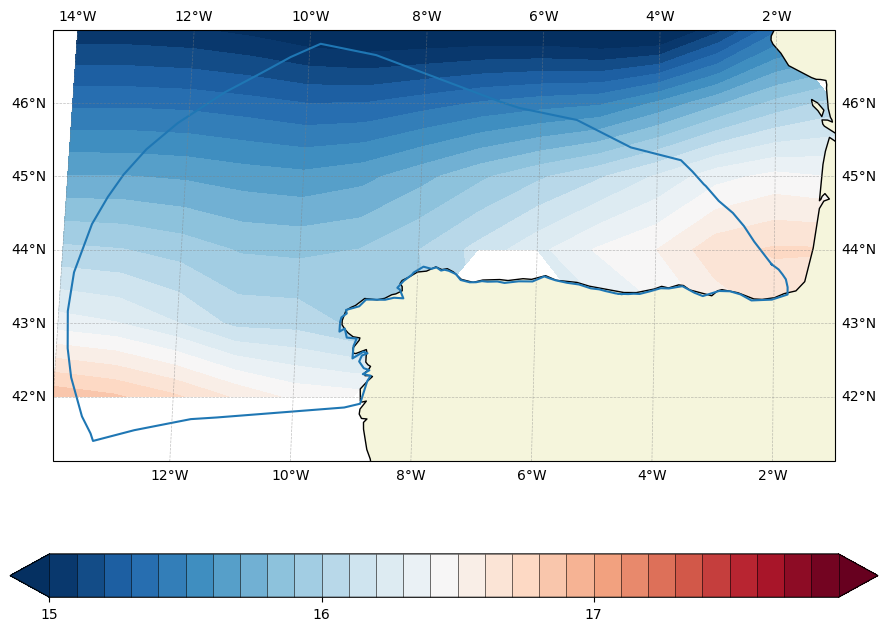

In [115]:
fig = plt.figure(figsize=(14,8))
ax = plt.axes(projection=ccrs.Robinson())

cm = ax.contourf(meanTemp.lon,meanTemp.lat,meanTemp, levels=niveles, 
               transform=ccrs.PlateCarree(),
               cmap = plt.cm.RdBu.reversed(),
               vmin = niveles[0],vmax = niveles[-1],extend='both')

land = cartopy.feature.NaturalEarthFeature('physical', 'land', edgecolor='k', scale = '50m' ,
        facecolor=cfeature.COLORS['land'])

ax.add_feature(land, facecolor='beige')
    

cbar=fig.colorbar(cm,ax=ax, location='bottom',
                  shrink=.8, ticks=np.arange(niveles[0],niveles[-1],1), 
                  drawedges=True)

ax.plot(lon, lat, transform=ccrs.PlateCarree())
ax.gridlines(draw_labels=True, linewidth=.5,color='gray', alpha=0.5, linestyle='--')
#ax.set_title(Title + ', ' + sst.time.dt.strftime("%d %B %Y").values + '\n');
#    plt.savefig(FileOut)


In [116]:
prof_mean_temp = DC_temp.stack(flat_dim=('lon', 'lat','time')).mean('flat_dim')
prof_std_temp  = DC_temp.stack(flat_dim=('lon', 'lat','time')).std('flat_dim')

prof_mean_salt = DC_salt.stack(flat_dim=('lon', 'lat','time')).mean('flat_dim')
prof_std_salt  = DC_salt.stack(flat_dim=('lon', 'lat','time')).std('flat_dim')

/Users/pvb/miniconda3/envs/ocean/lib/python3.11/site-packages/numpy/lib/nanfunctions.py:1879: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/Users/pvb/miniconda3/envs/ocean/lib/python3.11/site-packages/numpy/lib/nanfunctions.py:1879: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,


In [117]:
prof_mean_temp

<xarray.DataArray 'temperature' (depth: 42)> Size: 336B
array([15.83989493, 15.6248475 , 15.2166694 , 14.67643178, 14.12753429,
       13.67990153, 13.35195799, 13.14075945, 12.95388315, 12.80653937,
       12.70613161, 12.6342948 , 12.55640916, 12.47847648, 12.39989695,
       12.29197997, 12.19039198, 12.07719798, 11.94996032, 11.80466442,
       11.62896578, 11.3867738 , 11.09241735, 10.80059723, 10.60028257,
       10.21504776,  9.2385167 ,  7.10438442,  5.10279036,  4.10702842,
        3.63378938,  3.27464947,  2.96127903,  2.72702859,  2.56044199,
        2.43623203,  2.35427761,  2.30203866,  2.27341005,  2.2435348 ,
        2.22232352,         nan])
Coordinates:
  * depth    (depth) float32 168B 5.022 15.08 25.16 ... 5.051e+03 5.35e+03

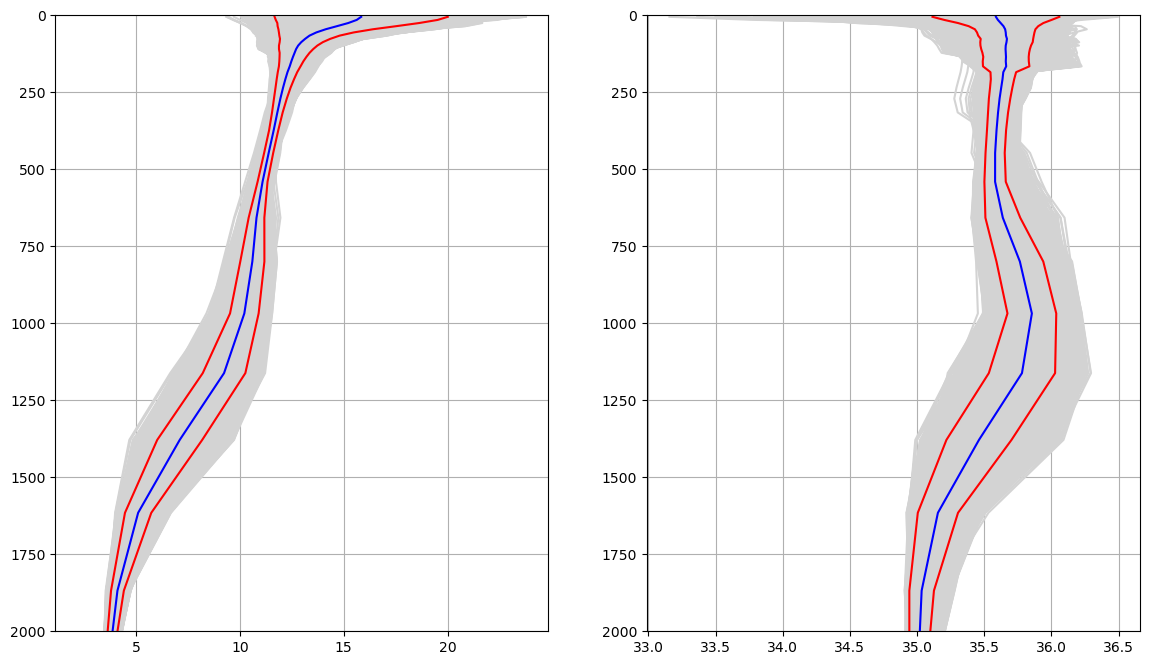

In [118]:
fig,ax= plt.subplots(1,2,figsize=(14,8))

ax[0].plot(DC_temp.stack(flat_dim=('lon', 'lat','time')),DC_temp.depth, color='lightgrey')
ax[0].plot(prof_mean_temp,prof_mean_temp.depth,color='blue')  
ax[0].plot(prof_mean_temp+1.5*prof_std_temp,prof_mean_temp.depth,color='red')  
ax[0].plot(prof_mean_temp-1.5*prof_std_temp,prof_mean_temp.depth,color='red')  
ax[0].invert_yaxis()
ax[0].set_ylim([2000,0]);
ax[0].grid()

ax[1].plot(DC_salt.stack(flat_dim=('lon', 'lat','time')),DC_temp.depth, color='lightgrey')
ax[1].plot(prof_mean_salt,prof_mean_temp.depth,color='blue')  
ax[1].plot(prof_mean_salt+1.5*prof_std_salt,prof_mean_salt.depth,color='red')  
ax[1].plot(prof_mean_salt-1.5*prof_std_salt,prof_mean_salt.depth,color='red')  
ax[1].invert_yaxis()
ax[1].set_ylim([2000,0]);
ax[1].grid()

## Seasonal cycle
Create seasonal climatology from 1982 to 1992 and the asociated anomaly

In [119]:
#Create monthly climatology
DC_temp_clim = DC_temp.sel(time=slice(yearC1,yearC2)).groupby('time.month').mean(dim='time').load();
DC_salt_clim = DC_salt.sel(time=slice(yearC1,yearC2)).groupby('time.month').mean(dim='time').load();

#Create anomaly
DC_temp_anom = DC_temp.groupby('time.month') - DC_temp_clim
DC_temp_anom.load();

DC_salt_anom = DC_salt.groupby('time.month') - DC_salt_clim
DC_salt_anom.load();

In [120]:
DC_temp_clim

<xarray.DataArray 'temperature' (month: 12, depth: 42, lat: 6, lon: 14)> Size: 339kB
array([[[[14.64053351, 14.55656424, 14.4145704 , ...,         nan,
                  nan,         nan],
         [14.16840766, 14.08277979, 13.92468777, ..., 13.08634478,
          12.98736451,         nan],
         [13.9438989 , 13.87566366, 13.76325296, ..., 13.25176166,
          13.1019736 , 12.94015652],
         [13.73219258, 13.66846997, 13.57285395, ..., 12.99539302,
          12.86502034, 12.70746635],
         [13.50773945, 13.436249  , 13.33556992, ..., 12.54000305,
          12.50561673, 12.46287432],
         [13.23428288, 13.14185801, 13.02015009, ..., 11.95106544,
          12.08468094,         nan]],

        [[14.61431971, 14.52082879, 14.37467311, ...,         nan,
                  nan,         nan],
         [14.13632002, 14.04279222, 13.87622935, ..., 13.12782755,
          13.04878543,         nan],
         [13.91220528, 13.83858814, 13.72165384, ..., 13.33424797,
          13.21654962, 13.06292588],
         [13.70991046, 13.64322796, 13.54633338, ..., 13.12597377,
...
                  nan,         nan],
         [ 2.22141157,  2.22087596,  2.22042098, ...,         nan,
                  nan,         nan],
         [ 2.22220117,  2.22186608,  2.22169441, ...,         nan,
                  nan,         nan],
         [        nan,  2.22287021,         nan, ...,         nan,
                  nan,         nan]],

        [[        nan,         nan,         nan, ...,         nan,
                  nan,         nan],
         [        nan,         nan,         nan, ...,         nan,
                  nan,         nan],
         [        nan,         nan,         nan, ...,         nan,
                  nan,         nan],
         [        nan,         nan,         nan, ...,         nan,
                  nan,         nan],
         [        nan,         nan,         nan, ...,         nan,
                  nan,         nan],
         [        nan,         nan,         nan, ...,         nan,
                  nan,         nan]]]])
Coordinates:
  * lon      (lon) float32 56B 346.0 347.0 348.0 349.0 ... 357.0 358.0 359.0
  * lat      (lat) float32 24B 42.0 43.0 44.0 45.0 46.0 47.0
  * depth    (depth) float32 168B 5.022 15.08 25.16 ... 5.051e+03 5.35e+03
  * month    (month) int64 96B 1 2 3 4 5 6 7 8 9 10 11 12

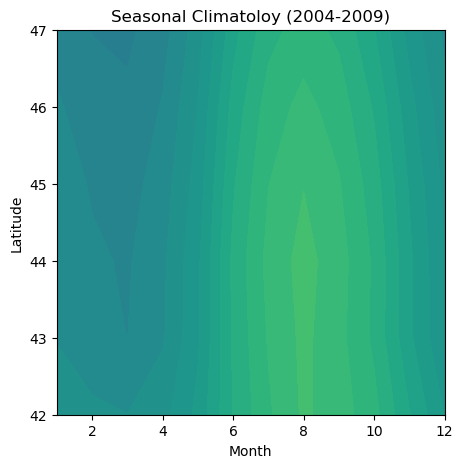

In [121]:
fig, ax = plt.subplots(1, 1 , figsize=(5,5))
ax.contourf(DC_temp_clim.mean(dim='lon').sel(depth=10, method='nearest').month,
                 DC_temp_clim.mean(dim='lon').sel(depth=10, method='nearest').lat,
                 DC_temp_clim.mean(dim='lon').sel(depth=10, method='nearest').transpose(),
            levels=12, vmin=-2, vmax=30)
ax.grid()
ax.set_title('Seasonal Climatoloy (' + yearC1 + '-' + yearC2 + ')')
ax.set_ylabel('Latitude') 
ax.set_xlabel('Month')
ax.grid()

# Weighted mean

In [122]:
weights = np.cos(np.deg2rad(DC.temperature.lat))
weights = weights/weights.max()
weights.name = "weights"
DC_temp_weighted = DC_temp.weighted(weights)
DC_salt_weighted = DC_salt.weighted(weights)
DC_temp_anom_weighted = DC_temp_anom.weighted(weights)
DC_salt_anom_weighted = DC_salt_anom.weighted(weights)


DC_temp_wmean = DC_temp_weighted.mean(("lon", "lat"),skipna=True).load()
DC_salt_wmean = DC_salt_weighted.mean(("lon", "lat"),skipna=True).load()

DC_temp_anom_wmean = DC_temp_anom_weighted.mean(("lon", "lat"),skipna=True).load()
DC_salt_anom_wmean = DC_salt_anom_weighted.mean(("lon", "lat"),skipna=True).load()

In [123]:
DC_temp_wmean

<xarray.DataArray 'temperature' (time: 288, depth: 42)> Size: 97kB
array([[12.72768961, 12.86872058, 12.93850105, ...,  2.24930671,
         2.22079165,         nan],
       [12.42805828, 12.57780447, 12.62720505, ...,  2.25264983,
         2.22261338,         nan],
       [12.7573814 , 12.80993192, 12.8167224 , ...,  2.25158973,
         2.22263292,         nan],
       ...,
       [19.18483836, 19.13347613, 19.04305413, ...,  2.24259773,
         2.22390047,         nan],
       [16.03533648, 15.95424369, 15.99746322, ...,  2.24180642,
         2.22239296,         nan],
       [14.82261203, 14.7897089 , 14.79714968, ...,  2.24530331,
         2.22345975,         nan]])
Coordinates:
  * depth    (depth) float32 168B 5.022 15.08 25.16 ... 5.051e+03 5.35e+03
  * time     (time) datetime64[ns] 2kB 2000-01-16T12:00:00 ... 2023-12-16T12:...

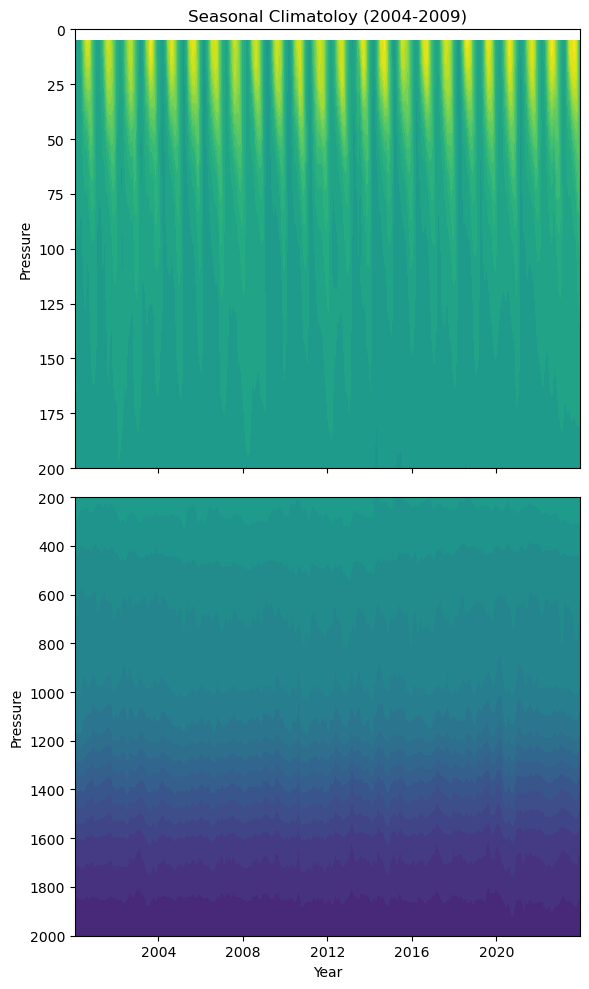

In [124]:
fig, ax = plt.subplots(2, 1 , sharex=True, figsize=(6,10))
ax[0].contourf(DC_temp_wmean.time, DC_temp_wmean.depth, 
            DC_temp_wmean.transpose(), 32)
ax[0].set_title('Seasonal Climatoloy (' + yearC1 + '-' + yearC2 + ')')
ax[0].set_ylabel('Pressure') 
ax[0].invert_yaxis()
ax[0].set_ylim([200,0]);

ax[1].contourf(DC_temp_wmean.time, DC_temp_wmean.depth, 
            DC_temp_wmean.transpose(), 32)
ax[1].set_ylabel('Pressure') 
ax[1].set_xlabel('Year')
ax[1].invert_yaxis()
ax[1].set_ylim([2000,200]);

fig.tight_layout()


## smoothed versions

In [125]:
DC_temp_wmean_rolling = DC_temp_wmean.rolling(time=12,center=True).mean()
DC_salt_wmean_rolling = DC_salt_wmean.rolling(time=12,center=True).mean()

DC_temp_anom_wmean_rolling = DC_temp_anom_wmean.rolling(time=12,center=True).mean()
DC_salt_anom_wmean_rolling = DC_salt_anom_wmean.rolling(time=12,center=True).mean()

## Plots

In [126]:
Posiciones=[(0.10, 0.65, 0.8, 0.22),
            (0.10, 0.48, 0.8, 0.165),
            (0.10, 0.10, 0.8, 0.378)]

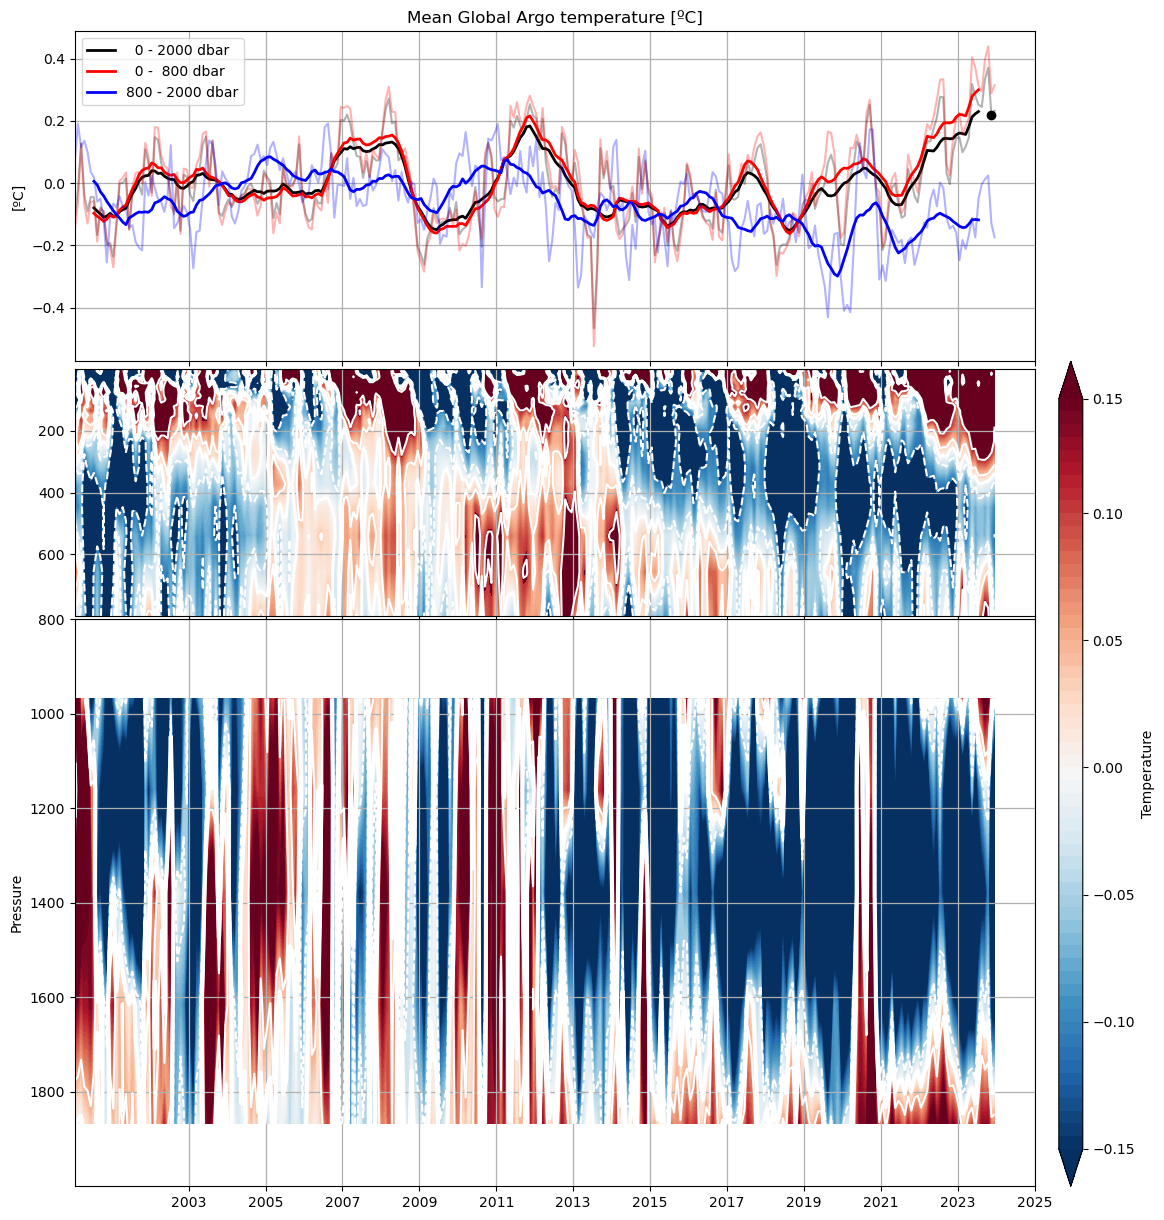

In [127]:
fig, ax = plt.subplots(3,1,figsize = (12,15),sharex=True)


# Mean values
ax[0].plot(DC_temp_anom_wmean.time,
           DC_temp_anom_wmean.sel(depth=slice(0,2000)).mean("depth"),color='k',alpha=0.3)
ax[0].plot(DC_temp_anom_wmean.time[-2],
           DC_temp_anom_wmean.sel(depth=slice(0,2000)).mean("depth")[-2],'ko')
ax[0].plot(DC_temp_anom_wmean_rolling.time,
           DC_temp_anom_wmean_rolling.sel(depth=slice(0,2000)).mean("depth"),linewidth=2,color='k',  label= '  0 - 2000 dbar')


ax[0].plot(DC_temp_anom_wmean.time,
           DC_temp_anom_wmean.sel(depth=slice(0,800)).mean("depth"),color='r',alpha=0.3)
ax[0].plot(DC_temp_anom_wmean_rolling.time,
           DC_temp_anom_wmean_rolling.sel(depth=slice(0,800)).mean("depth"),linewidth=2,color='r' ,  label= '  0 -  800 dbar')

ax[0].plot(DC_temp_anom_wmean.time,
           DC_temp_anom_wmean.sel(depth=slice(800,2000)).mean("depth"),color='b',alpha=0.3)
ax[0].plot(DC_temp_anom_wmean_rolling.time,
           DC_temp_anom_wmean_rolling.sel(depth=slice(800,2000)).mean("depth"),linewidth=2,color='b',label= '800 - 2000 dbar')
ax[0].grid(linestyle='-', linewidth=.9)
ax[0].set_position(Posiciones[0])
ax[0].legend()
ax[0].set_ylabel('[ºC]')
ax[0].set_title('Mean Global Argo temperature [ºC]')

# UpperOcean
ax[1].contour(DC_temp_anom_wmean.time, DC_temp_anom_wmean.sel(depth=slice(0,800)).depth, 
              DC_temp_anom_wmean.sel(depth=slice(0,800)).transpose()
              ,colors='w',levels=[-0.15, -0.05, 0.05, 0.15] )
ax[1].contour(DC_temp_anom_wmean.time, DC_temp_anom_wmean.sel(depth=slice(0,800)).depth, 
              DC_temp_anom_wmean.sel(depth=slice(0,800)).transpose(),colors='w', linewidths=2,
              levels=[0] )

ax[1].contourf(DC_temp_anom_wmean.time, DC_temp_anom_wmean.sel(depth=slice(0,800)).depth, 
              DC_temp_anom_wmean.sel(depth=slice(0,800)).transpose(),
              cmap='RdBu_r',levels=np.arange(-0.15,0.15,0.005),extend='both',vmin=-0.2, vmax=0.2)
ax[1].set_ylim(0,800)
ax[1].invert_yaxis()
ax[1].set_yticks([200,400,600])
ax[1].grid(linestyle='-', linewidth=.9)
ax[1].set_position(Posiciones[1])

ax[2].contour(DC_temp_anom_wmean.time, DC_temp_anom_wmean.sel(depth=slice(800,2000)).depth, 
              DC_temp_anom_wmean.sel(depth=slice(800,2000)).transpose(),colors='w',
              levels=[-0.05,0.05] )
ax[2].contour(DC_temp_anom_wmean.time, DC_temp_anom_wmean.sel(depth=slice(800,2000)).depth, 
              DC_temp_anom_wmean.sel(depth=slice(800,2000)).transpose(),colors='w', linewidths=3,
              levels=[0] )
cntr2 = ax[2].contourf(DC_temp_anom_wmean.time, DC_temp_anom_wmean.sel(depth=slice(800,2000)).depth, 
                      DC_temp_anom_wmean.sel(depth=slice(800,2000)).transpose(),
                      cmap='RdBu_r',levels=np.arange(-0.15,0.15,0.005),extend='both')
ax[2].set_ylim(800,2000)
ax[2].invert_yaxis()
ax[2].set_yticks([800,1000,1200,1400,1600,1800])
ax[2].grid(linestyle='-', linewidth=.9)
ax[2].set_position(Posiciones[2])
ax[2].set_ylabel('Pressure')

# Adding the colorbar
cbaxes = fig.add_axes([0.92, 0.1, 0.02, 0.55])  
cb = fig.colorbar(cntr2, cax=cbaxes);
cbaxes.set_yticks([-0.15, -0.10, -0.05, 0, 0.05, 0.10, 0.15])
cbaxes.set_ylabel('Temperature')

# xtick Labels
ax[0].set_xticks(pd.date_range(start="2003-01-01", end="2025-01-01",freq='2YS-JAN'));
ax[1].set_xticks(pd.date_range(start="2003-01-01", end="2025-01-01",freq='2YS-JAN'));
ax[2].set_xticks(pd.date_range(start="2003-01-01", end="2025-01-01",freq='2YS-JAN'));

ax[2].set_xticklabels(pd.date_range(start="2003-01-01", end="2025-01-01",freq='2YS-JAN').strftime('%Y'));

### Salinity

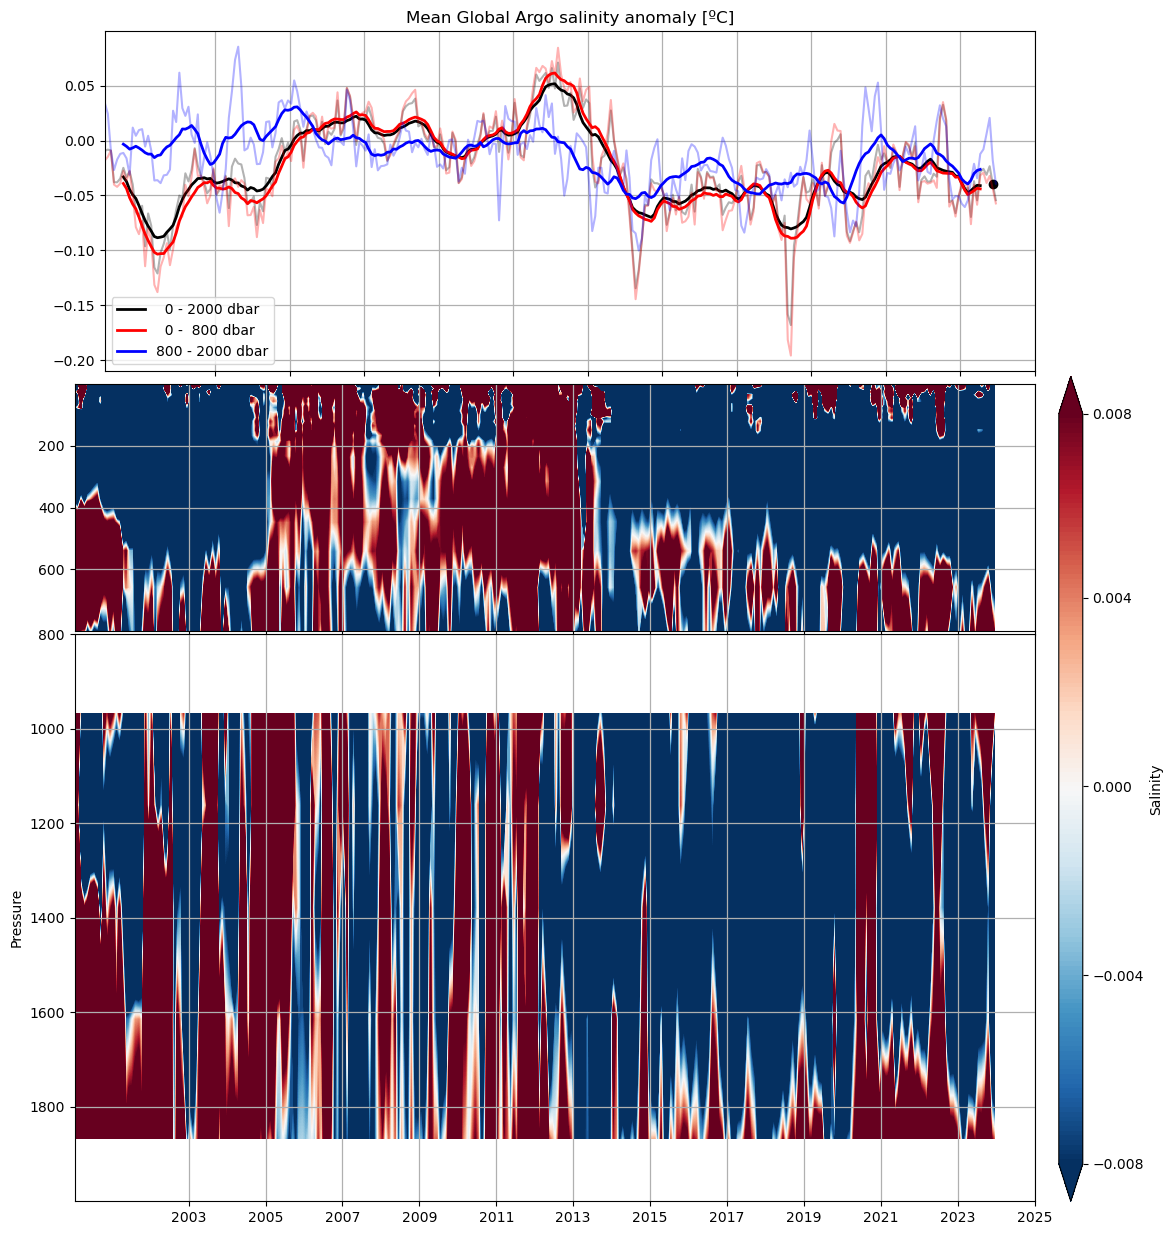

In [128]:
fig, ax = plt.subplots(3,1,figsize = (12,15),sharex=True)

# Mean values
ax[0].plot(DC_salt_anom_wmean.time,
           DC_salt_anom_wmean.sel(depth=slice(0,2000)).mean("depth"),color='k',alpha=0.3)
ax[0].plot(DC_salt_anom_wmean.time[-2],
           DC_salt_anom_wmean.sel(depth=slice(0,2000)).mean("depth")[-2],'ko')
ax[0].plot(DC_salt_anom_wmean_rolling.time,
           DC_salt_anom_wmean_rolling.sel(depth=slice(0,2000)).mean("depth"),linewidth=2,color='k',  label= '  0 - 2000 dbar')


ax[0].plot(DC_salt_anom_wmean.time,
           DC_salt_anom_wmean.sel(depth=slice(0,800)).mean("depth"),color='r',alpha=0.3)
ax[0].plot(DC_salt_anom_wmean_rolling.time,
           DC_salt_anom_wmean_rolling.sel(depth=slice(0,800)).mean("depth"),linewidth=2,color='r' ,  label= '  0 -  800 dbar')

ax[0].plot(DC_salt_anom_wmean.time,
           DC_salt_anom_wmean.sel(depth=slice(800,2000)).mean("depth"),color='b',alpha=0.3)
ax[0].plot(DC_salt_anom_wmean_rolling.time,
           DC_salt_anom_wmean_rolling.sel(depth=slice(800,2000)).mean("depth"),linewidth=2,color='b',label= '800 - 2000 dbar')

ax[0].grid(linestyle='-', linewidth=.9)
ax[0].legend()
ax[2].set_ylabel('[ºC]')
ax[0].set_title('Mean Global Argo salinity anomaly [ºC]')

ax[1].contourf(DC_salt_anom_wmean.time, DC_salt_anom_wmean.sel(depth=slice(0,800)).depth, 
                      DC_salt_anom_wmean.sel(depth=slice(0,800)).transpose(),20,cmap='RdBu_r',levels=np.arange(-0.008,.008,0.0001),extend='both')
ax[1].invert_yaxis()
ax[1].grid(linestyle='-', linewidth=.9)
ax[1].set_ylim(0,800)
ax[1].invert_yaxis()
ax[1].set_yticks([200,400,600])
ax[1].grid(linestyle='-', linewidth=.9)
ax[1].set_position(Posiciones[1])

cntr2 = ax[2].contourf(DC_salt_anom_wmean.time, DC_salt_anom_wmean.sel(depth=slice(800,2000)).depth, 
                      DC_salt_anom_wmean.sel(depth=slice(800,2000)).transpose(),20,cmap='RdBu_r',levels=np.arange(-0.008,.008,0.0001),extend='both')
ax[2].invert_yaxis()
ax[2].grid(linestyle='-', linewidth=.9)
ax[2].set_ylim(800,2000)
ax[2].invert_yaxis()
ax[2].set_yticks([800,1000,1200,1400,1600,1800])
ax[2].grid(linestyle='-', linewidth=.9)
ax[2].set_position(Posiciones[2])
ax[2].set_ylabel('Pressure')

# Adding the colorbar
cbaxes = fig.add_axes([0.92, 0.1, 0.02, 0.55])  
cb = fig.colorbar(cntr2, cax=cbaxes);
cbaxes.set_yticks([-0.008, -0.004,  0, 0.004, .008])
cbaxes.set_ylabel('Salinity')

# xtick Labels
ax[0].set_xticks(pd.date_range(start="2003-01-01", end="2025-01-01",freq='2YS-JAN'));
ax[1].set_xticks(pd.date_range(start="2003-01-01", end="2025-01-01",freq='2YS-JAN'));
ax[2].set_xticks(pd.date_range(start="2003-01-01", end="2025-01-01",freq='2YS-JAN'));

ax[2].set_xticklabels(pd.date_range(start="2003-01-01", end="2025-01-01",freq='2YS-JAN').strftime('%Y'));


Text(0.5, 1.0, 'Mean Salinity [ºC] in Demarcación marina noratlántica')

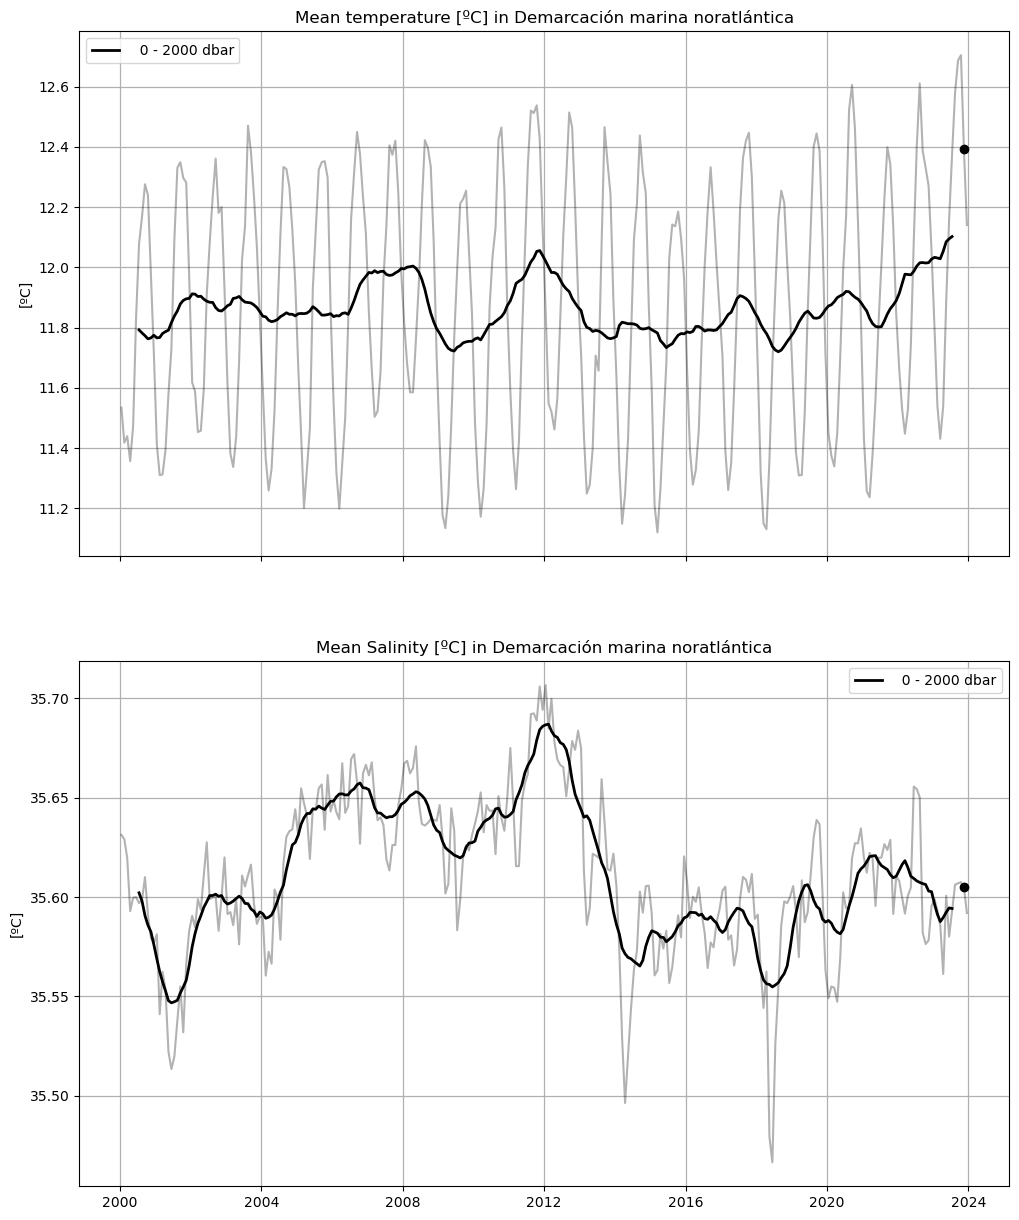

In [129]:
fig, ax = plt.subplots(2,1,figsize = (12,15),sharex=True)


# Mean values
ax[0].plot(DC_temp_wmean.time,
           DC_temp_wmean.sel(depth=slice(0,2000)).mean("depth"),color='k',alpha=0.3)
ax[0].plot(DC_temp_wmean.time[-2],
           DC_temp_wmean.sel(depth=slice(0,2000)).mean("depth")[-2],'ko')
ax[0].plot(DC_temp_wmean_rolling.time,
           DC_temp_wmean_rolling.sel(depth=slice(0,2000)).mean("depth"),linewidth=2,color='k',  label= '  0 - 2000 dbar')

ax[0].grid(linestyle='-', linewidth=.9)
ax[0].legend()
ax[0].set_ylabel('[ºC]')
ax[0].set_title('Mean temperature [ºC] in '+ titulo)



# Mean values
ax[1].plot(DC_salt_wmean.time,
           DC_salt_wmean.sel(depth=slice(0,2000)).mean("depth"),color='k',alpha=0.3)
ax[1].plot(DC_salt_wmean.time[-2],
           DC_salt_wmean.sel(depth=slice(0,2000)).mean("depth")[-2],'ko')
ax[1].plot(DC_salt_wmean_rolling.time,
           DC_salt_wmean_rolling.sel(depth=slice(0,2000)).mean("depth"),linewidth=2,color='k',  label= '  0 - 2000 dbar')

ax[1].grid(linestyle='-', linewidth=.9)
ax[1].legend()
ax[1].set_ylabel('[ºC]')
ax[1].set_title('Mean Salinity [ºC] in '+ titulo)
